In [1]:
from pyrtid.utils import NDArrayFloat
import numpy as np
import matplotlib.pyplot as plt
from pyrtid.inverse.preconditioner import (
    SigmoidRescaler,
    SigmoidRescalerBounded,
    to_new_range,
    tanh_wrapper,
    dtanh_wrapper,
    arctanh_wrapper,
    darctanh_wrapper,
    SubSelector,
)
import numdifftools as nd

In [2]:
np.logspace(-9, -4, 100)

array([1.00000000e-09, 1.12332403e-09, 1.26185688e-09, 1.41747416e-09,
       1.59228279e-09, 1.78864953e-09, 2.00923300e-09, 2.25701972e-09,
       2.53536449e-09, 2.84803587e-09, 3.19926714e-09, 3.59381366e-09,
       4.03701726e-09, 4.53487851e-09, 5.09413801e-09, 5.72236766e-09,
       6.42807312e-09, 7.22080902e-09, 8.11130831e-09, 9.11162756e-09,
       1.02353102e-08, 1.14975700e-08, 1.29154967e-08, 1.45082878e-08,
       1.62975083e-08, 1.83073828e-08, 2.05651231e-08, 2.31012970e-08,
       2.59502421e-08, 2.91505306e-08, 3.27454916e-08, 3.67837977e-08,
       4.13201240e-08, 4.64158883e-08, 5.21400829e-08, 5.85702082e-08,
       6.57933225e-08, 7.39072203e-08, 8.30217568e-08, 9.32603347e-08,
       1.04761575e-07, 1.17681195e-07, 1.32194115e-07, 1.48496826e-07,
       1.66810054e-07, 1.87381742e-07, 2.10490414e-07, 2.36448941e-07,
       2.65608778e-07, 2.98364724e-07, 3.35160265e-07, 3.76493581e-07,
       4.22924287e-07, 4.75081016e-07, 5.33669923e-07, 5.99484250e-07,
      

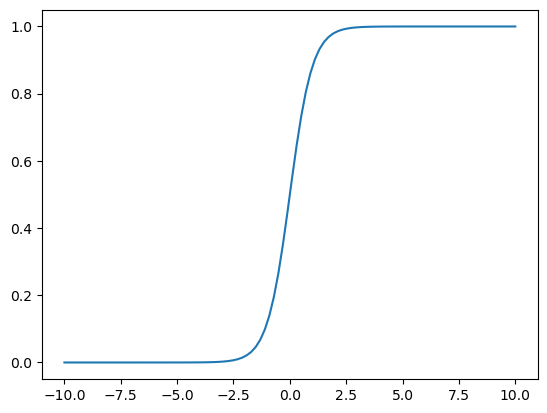

In [3]:
pcd = SigmoidRescaler(rate=1.0)
x = np.linspace(-10, 10, 100)
y = pcd.backtransform(x)


# x2 = pcd.transform(y)
# g = np.random.default_rng(2024).normal(size=100)
# pcd.dbacktransform_vec(y, g)
# np.testing.assert_allclose(x, x2)
# y = tanh(x, rate=pcd.rate)


plt.plot(x, y)

In [4]:
x = np.logspace(-9, -4, 100)

In [5]:
x

array([1.00000000e-09, 1.12332403e-09, 1.26185688e-09, 1.41747416e-09,
       1.59228279e-09, 1.78864953e-09, 2.00923300e-09, 2.25701972e-09,
       2.53536449e-09, 2.84803587e-09, 3.19926714e-09, 3.59381366e-09,
       4.03701726e-09, 4.53487851e-09, 5.09413801e-09, 5.72236766e-09,
       6.42807312e-09, 7.22080902e-09, 8.11130831e-09, 9.11162756e-09,
       1.02353102e-08, 1.14975700e-08, 1.29154967e-08, 1.45082878e-08,
       1.62975083e-08, 1.83073828e-08, 2.05651231e-08, 2.31012970e-08,
       2.59502421e-08, 2.91505306e-08, 3.27454916e-08, 3.67837977e-08,
       4.13201240e-08, 4.64158883e-08, 5.21400829e-08, 5.85702082e-08,
       6.57933225e-08, 7.39072203e-08, 8.30217568e-08, 9.32603347e-08,
       1.04761575e-07, 1.17681195e-07, 1.32194115e-07, 1.48496826e-07,
       1.66810054e-07, 1.87381742e-07, 2.10490414e-07, 2.36448941e-07,
       2.65608778e-07, 2.98364724e-07, 3.35160265e-07, 3.76493581e-07,
       4.22924287e-07, 4.75081016e-07, 5.33669923e-07, 5.99484250e-07,
      

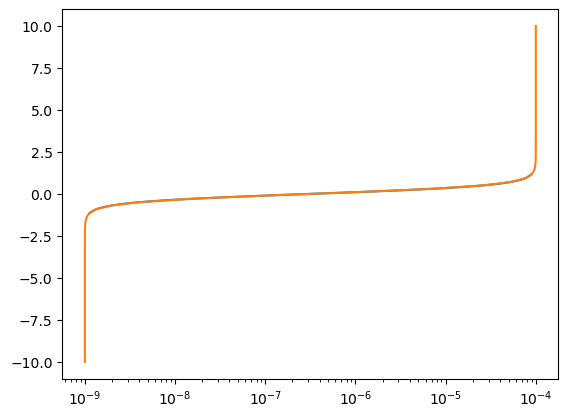

In [16]:
pcd = SigmoidRescalerBounded(1e-9, 1e-4, rate=2.0, is_log10=True)
x = np.logspace(-9, -4, 100)
y = pcd.transform(x)

y2 = np.linspace(-10, 10, 100)
x2 = pcd.backtransform(y2)

# x2 = pcd.transform(y)
# g = np.random.default_rng(2024).normal(size=100)
# pcd.dbacktransform_vec(y, g)
# np.testing.assert_allclose(x, x2)
# y = tanh(x, rate=pcd.rate)


plt.semilogx(x, y)
plt.semilogx(x2, y2)

In [7]:
pcd.transform_bounds(np.array([[1, 2, 3], [2, 3, 5]]).T)

array([[-10,  10],
       [-10,  10],
       [-10,  10]])

In [8]:
test_data = pcd._get_test_data(1e-9, 1e-4, shape=10)
test_data

array([8.80635742e-06, 2.20447840e-05, 1.13179423e-05, 4.42972405e-05,
       6.97334448e-05, 5.46186683e-05, 7.61862883e-05, 5.84905434e-05,
       8.96527546e-05, 1.50815180e-05])

In [9]:
pcd._test_preconditioner(1e-9, 1e-4, shape=10, eps=1e-9)

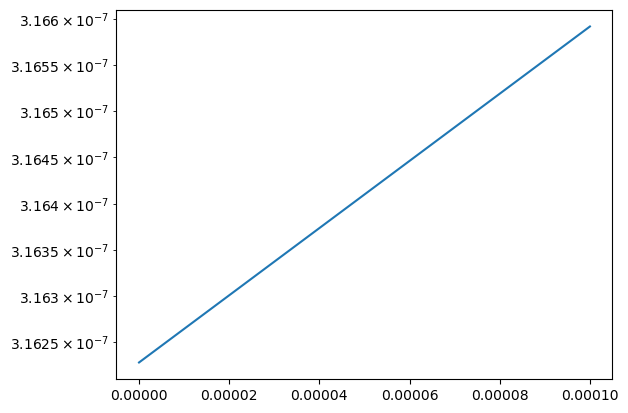

In [10]:
y_scaled = pcd.backtransform(x)
plt.semilogy(x, y_scaled)

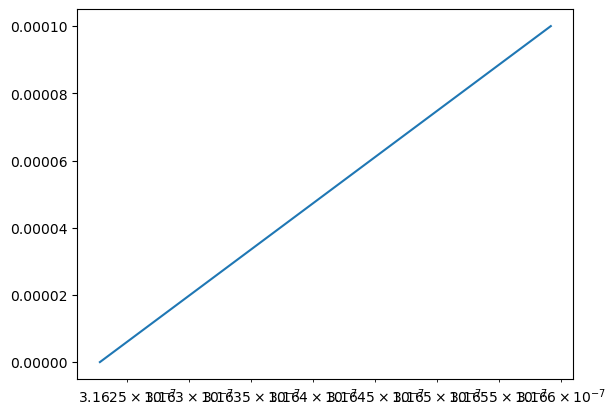

In [11]:
plt.semilogx(y_scaled, pcd.transform(y_scaled))

In [12]:
pcd.transform(y_scaled)

array([9.99999861e-10, 1.12332388e-09, 1.26185662e-09, 1.41747403e-09,
       1.59228253e-09, 1.78864934e-09, 2.00923267e-09, 2.25701957e-09,
       2.53536414e-09, 2.84803581e-09, 3.19926707e-09, 3.59381347e-09,
       4.03701717e-09, 4.53487836e-09, 5.09413800e-09, 5.72236758e-09,
       6.42807274e-09, 7.22080895e-09, 8.11130818e-09, 9.11162723e-09,
       1.02353099e-08, 1.14975699e-08, 1.29154965e-08, 1.45082878e-08,
       1.62975083e-08, 1.83073827e-08, 2.05651227e-08, 2.31012968e-08,
       2.59502421e-08, 2.91505304e-08, 3.27454915e-08, 3.67837976e-08,
       4.13201238e-08, 4.64158881e-08, 5.21400826e-08, 5.85702081e-08,
       6.57933223e-08, 7.39072201e-08, 8.30217567e-08, 9.32603345e-08,
       1.04761575e-07, 1.17681195e-07, 1.32194115e-07, 1.48496826e-07,
       1.66810054e-07, 1.87381742e-07, 2.10490414e-07, 2.36448941e-07,
       2.65608778e-07, 2.98364724e-07, 3.35160265e-07, 3.76493581e-07,
       4.22924287e-07, 4.75081016e-07, 5.33669923e-07, 5.99484250e-07,
      

In [13]:
y

array([       -inf, -1.14624187, -0.97039095, -0.86643398, -0.79189563,
       -0.73346422, -0.68521001, -0.64396961, -0.60785449, -0.57564627,
       -0.54651282, -0.51986039, -0.49525037, -0.47234948, -0.45089848,
       -0.43069165, -0.41156297, -0.39337648, -0.37601935, -0.35939691,
       -0.34342889, -0.3280466 , -0.31319074, -0.29880978, -0.28485857,
       -0.27129732, -0.25809073, -0.24520731, -0.23261884, -0.22029985,
       -0.20822728, -0.19638013, -0.18473918, -0.1732868 , -0.16200669,
       -0.15088376, -0.13990395, -0.12905412, -0.11832193, -0.10769573,
       -0.0971645 , -0.08671774, -0.07634541, -0.06603789, -0.05578589,
       -0.04558039, -0.03541263, -0.02527403, -0.01515616, -0.00505068,
        0.00505068,  0.01515616,  0.02527403,  0.03541263,  0.04558039,
        0.05578589,  0.06603789,  0.07634541,  0.08671774,  0.0971645 ,
        0.10769573,  0.11832193,  0.12905412,  0.13990395,  0.15088376,
        0.16200669,  0.1732868 ,  0.18473918,  0.19638013,  0.20

In [14]:
y_scaled

array([3.16227770e-07, 3.16227770e-07, 3.16227771e-07, 3.16227771e-07,
       3.16227772e-07, 3.16227773e-07, 3.16227773e-07, 3.16227774e-07,
       3.16227775e-07, 3.16227776e-07, 3.16227778e-07, 3.16227779e-07,
       3.16227781e-07, 3.16227783e-07, 3.16227785e-07, 3.16227787e-07,
       3.16227789e-07, 3.16227792e-07, 3.16227796e-07, 3.16227799e-07,
       3.16227803e-07, 3.16227808e-07, 3.16227813e-07, 3.16227819e-07,
       3.16227825e-07, 3.16227833e-07, 3.16227841e-07, 3.16227850e-07,
       3.16227860e-07, 3.16227872e-07, 3.16227885e-07, 3.16227900e-07,
       3.16227916e-07, 3.16227935e-07, 3.16227956e-07, 3.16227979e-07,
       3.16228006e-07, 3.16228035e-07, 3.16228068e-07, 3.16228106e-07,
       3.16228147e-07, 3.16228194e-07, 3.16228247e-07, 3.16228307e-07,
       3.16228373e-07, 3.16228448e-07, 3.16228532e-07, 3.16228627e-07,
       3.16228733e-07, 3.16228852e-07, 3.16228986e-07, 3.16229137e-07,
       3.16229306e-07, 3.16229496e-07, 3.16229709e-07, 3.16229949e-07,
      

In [15]:
tmp = to_new_range(np.log(y_scaled) / np.log(10.0), 0, 1)
tmp

TypeError: to_new_range() missing 2 required positional arguments: 'new_lbound' and 'new_ubound'

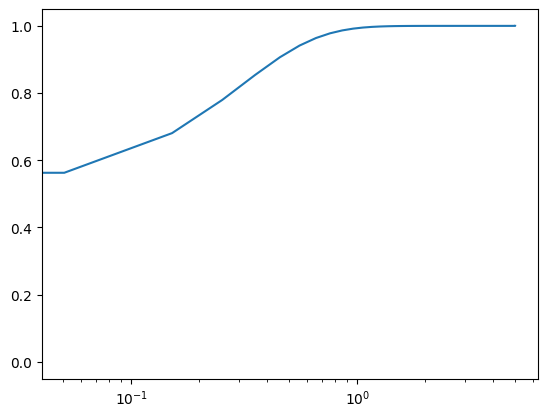

In [ ]:
# x = np.logspace(-10, -1, 100, base=10)
x2 = pcd.transform(y_scaled)
plt.semilogx(x2, y)

In [ ]:
x = np.logspace(-9, -4, 100, base=10)
tmp = to_new_range(np.log(x) / np.log(10.0), -5, -5)
# else:
#     tmp = to_new_range(s_raw, self.new_lbound, self.new_ubound)
# return logit(tmp)

In [ ]:
x = np.linspace(-5, 5, 100)

LogisticRescaler()

y = sigmoide(x)
# y = BoundsRescaler(1e-10, 1e-4).transform()
plt.semilogy(x, to_new_range_log(y, 1e-10, 1e-4))

NameError: name 'LogisticRescaler' is not defined

dérivee = f(x)(1 - f(x)) * d(x)